Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
First 5 Rows:


,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52



Shape: (150150, 9)

Columns: ['record_ID', 'week', 'store_id', 'sku_id', 'total_price', 'base_price', 'is_featured_sku', 'is_display_sku', 'units_sold']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   week             150150 non-null  object 
 2   store_id         150150 non-null  int64  
 3   sku_id           150150 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150150 non-null  float64
 6   is_featured_sku  150150 non-null  int64  
 7   is_display_sku   150150 non-null  int64  
 8   units_sold       150150 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB

Summary Statistics:


,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
count,150150.000000,150150,150150.000000,150150.000000,150149.000000,150150.000000,150150.000000,150150.000000,150150.000000
unique,NaN,130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,17/01/11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1155,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,106271.555504,NaN,9199.422511,254761.132468,206.626751,219.425927,0.095611,0.133200,51.674206
std,61386.037861,NaN,615.591445,85547.306447,103.308516,110.961712,0.294058,0.339792,60.207904
min,1.000000,NaN,8023.000000,216233.000000,41.325000,61.275000,0.000000,0.000000,1.000000
25%,53111.250000,NaN,8562.000000,217217.000000,130.387500,133.237500,0.000000,0.000000,20.000000
50%,106226.500000,NaN,9371.000000,222087.000000,198.075000,205.912500,0.000000,0.000000,35.000000
75%,159452.750000,NaN,9731.000000,245338.000000,233.700000,234.412500,0.000000,0.000000,62.000000



Missing Values:
record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64


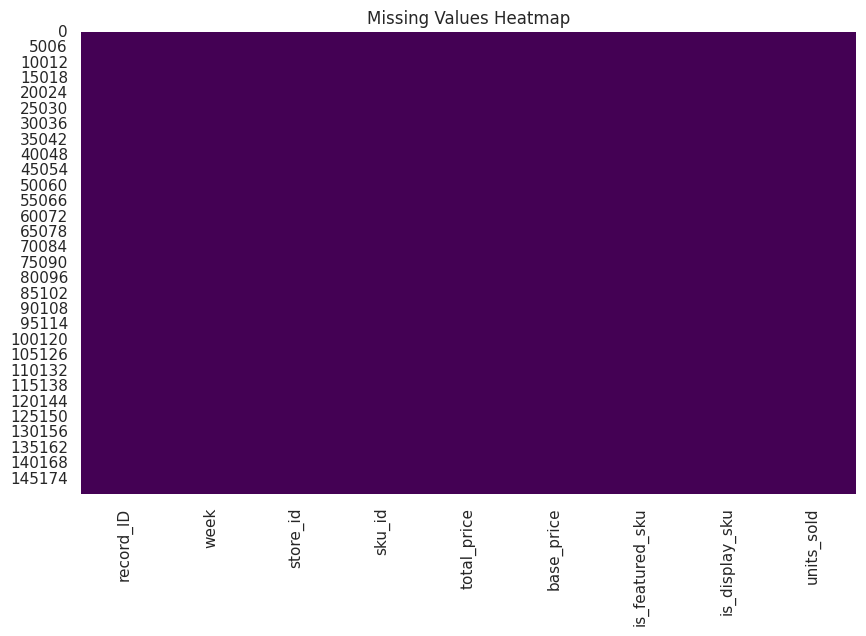


Duplicate Rows: 0


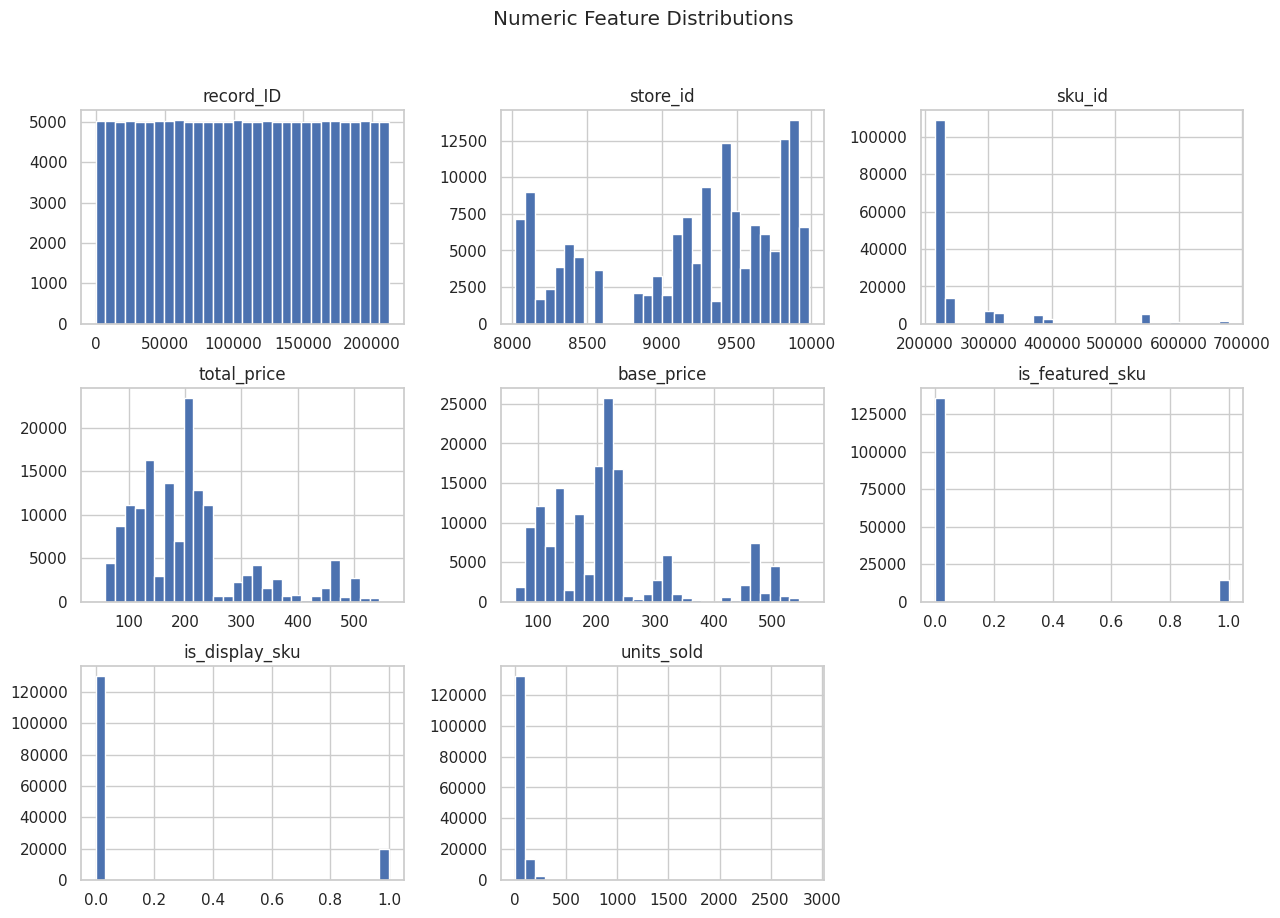

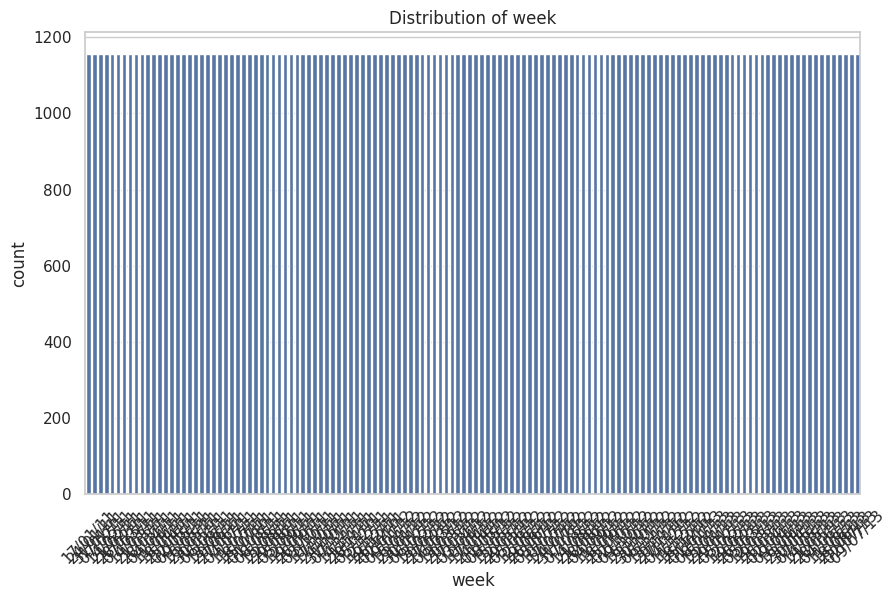

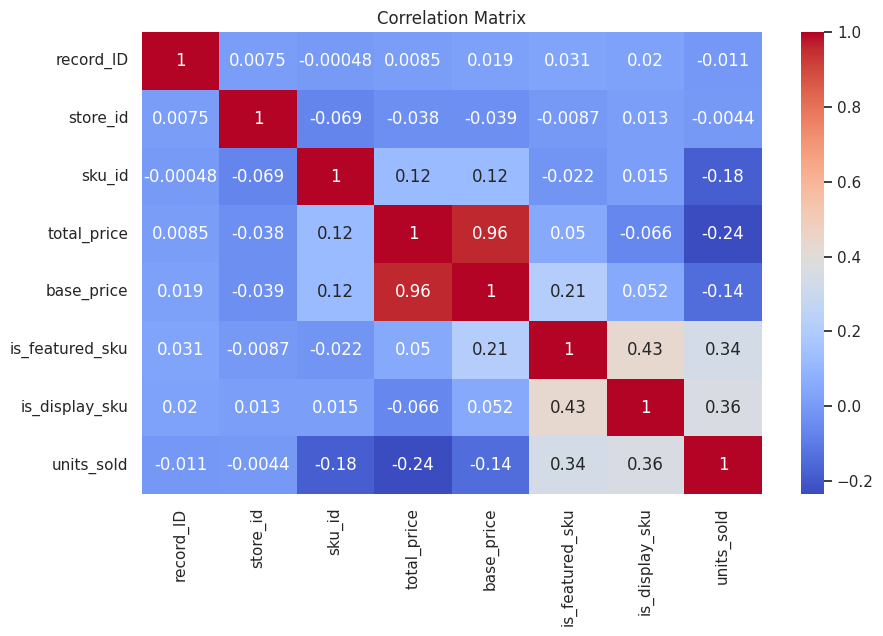

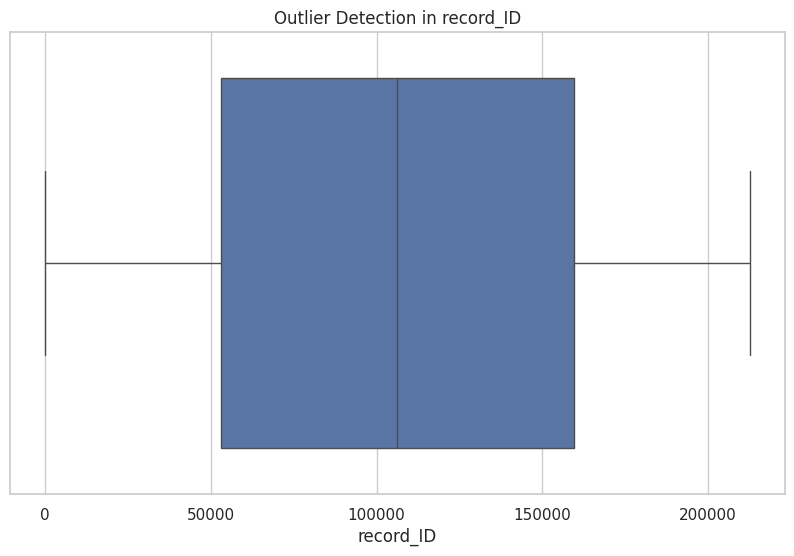

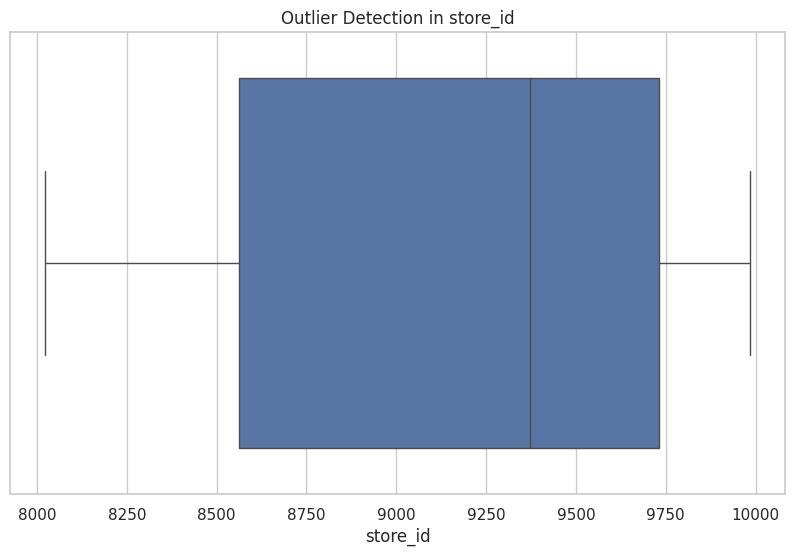

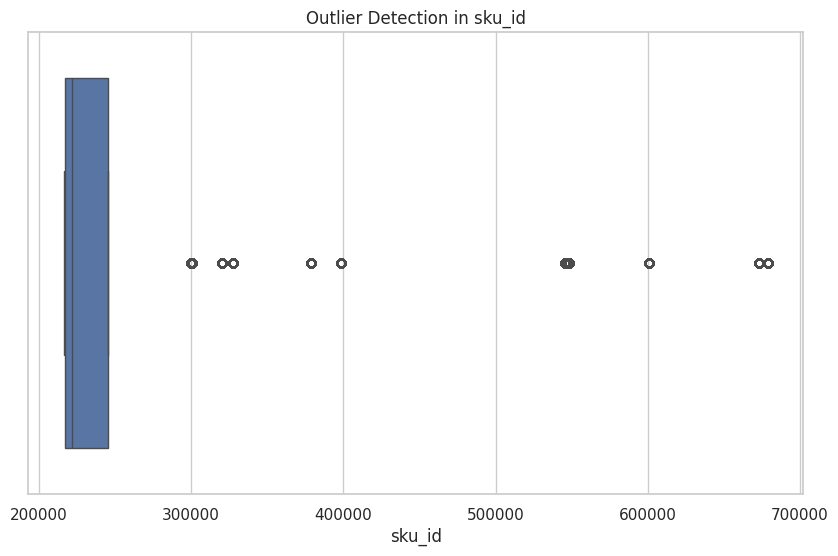

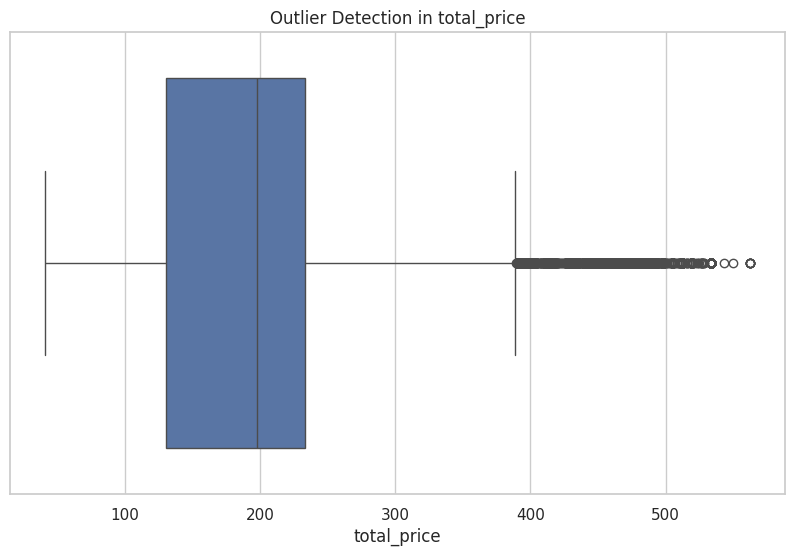

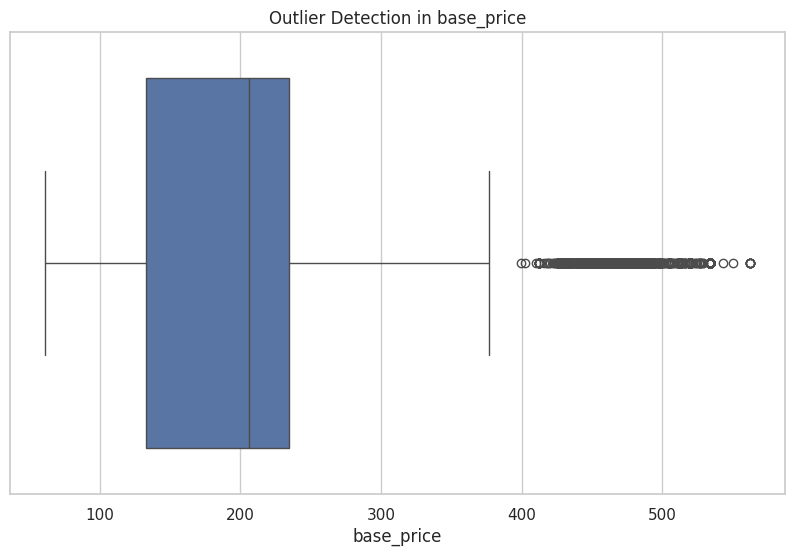

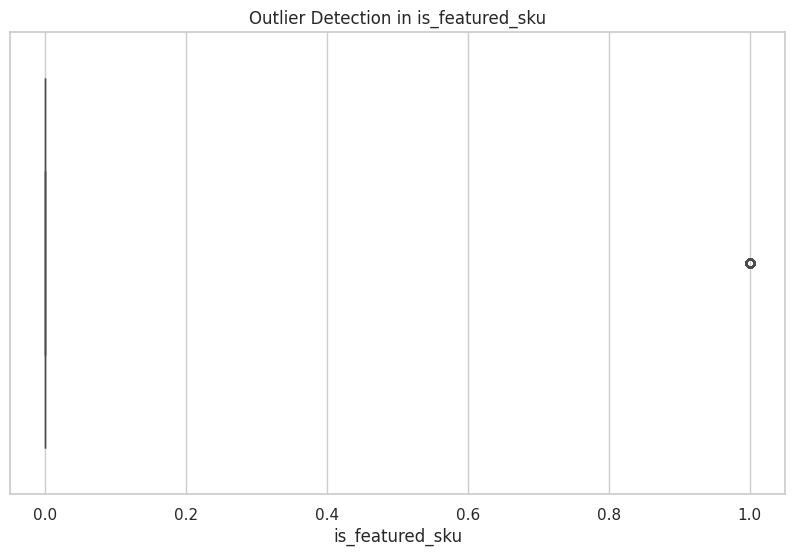

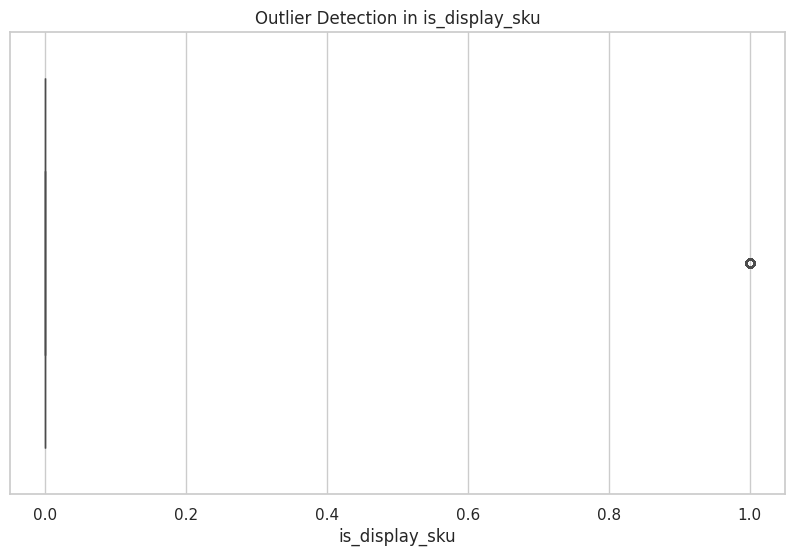

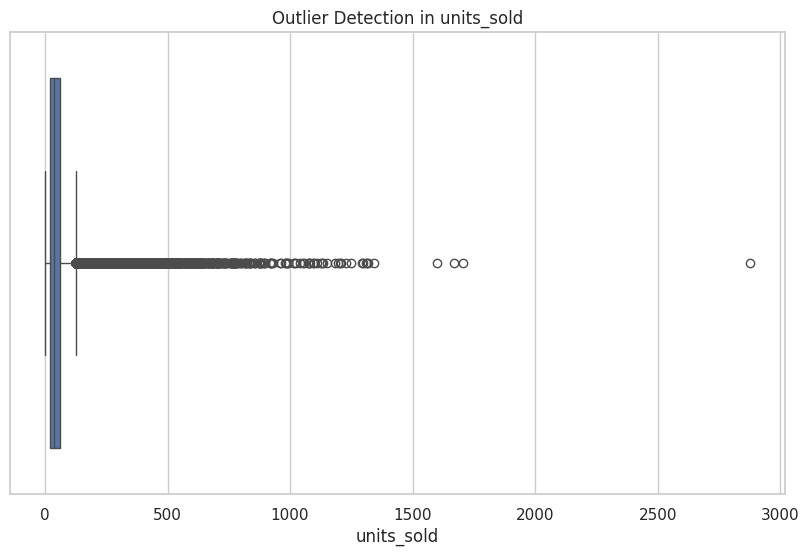


Number of unique values in each categorical column:
week: 130

Scaled Sample:


,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,-1.731190,-1.800587,-0.448211,-1.041440,-0.969377,-0.325145,-0.392006,-0.526082
1,-1.731174,-1.800587,-0.448200,-1.041440,-1.084958,-0.325145,-0.392006,-0.393209
2,-1.731158,-1.800587,-0.448129,-0.703495,-0.770322,-0.325145,-0.392006,-0.542691
3,-1.731141,-1.800587,-0.450374,-0.703495,-0.770322,-0.325145,-0.392006,-0.127462
4,-1.731125,-1.800587,-0.436849,-0.634526,-0.706110,-0.325145,-0.392006,0.005411


In [ ]:
# Data Visulaization
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Plot settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Load dataset
train_path = '/content/drive/MyDrive/dataset/train_0irEZ2H.csv'
train = pd.read_csv(train_path)

# 1. Understand the Data
print("First 5 Rows:")
display(train.head())
print("\nShape:", train.shape)
print("\nColumns:", train.columns.tolist())

# 2. Data Types and Structure
print("\nInfo:")
train.info()
print("\nSummary Statistics:")
display(train.describe(include='all'))

# 3. Missing Value Analysis
print("\nMissing Values:")
print(train.isnull().sum())
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# 4. Duplicate Data Check
duplicates = train.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")

# 5. Univariate Analysis (Numerical + Categorical)
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = train.select_dtypes(include=['object']).columns

# Histograms for numeric features
train[numeric_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle("Numeric Feature Distributions")
plt.show()

# Countplots for categorical features
for col in categorical_cols:
    sns.countplot(data=train, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

# 6. Bivariate and Multivariate Analysis
# Correlation matrix
if len(numeric_cols) > 1:
    corr = train[numeric_cols].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title("Correlation Matrix")
    plt.show()

# Pairplot (sampled if too large)
if len(numeric_cols) > 1 and train.shape[0] < 1000:
    sns.pairplot(train[numeric_cols])
    plt.show()

# 7. Outlier Detection (Boxplots)
for col in numeric_cols:
    sns.boxplot(x=train[col])
    plt.title(f'Outlier Detection in {col}')
    plt.show()

# 8. Feature Engineering (Example: Total columns or encodings)
print("\nNumber of unique values in each categorical column:")
for col in categorical_cols:
    print(f"{col}: {train[col].nunique()}")

# Example: Encode categorical if needed
le = LabelEncoder()
for col in categorical_cols:
    train[col] = le.fit_transform(train[col])

# 9. Data Transformation & Scaling
scaler = StandardScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(train[numeric_cols]), columns=numeric_cols)
print("\nScaled Sample:")
display(train_scaled.head())


In [8]:
# Data Preprocessing and Feature Engineering
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv('/content/drive/MyDrive/dataset/train_0irEZ2H.csv')

# Drop missing values and unnecessary column
df.dropna(inplace=True)
df.drop(['record_ID'], axis=1, inplace=True)

# Convert 'week' to datetime and sort
df['week'] = pd.to_datetime(df['week'], format="%y/%m/%d")
df.sort_values(by=['store_id', 'sku_id', 'week'], inplace=True)

# Lag features: previous 7 days' units_sold
for lag in range(1, 8):
    df[f'day_{lag}'] = df.groupby(['store_id', 'sku_id'])['units_sold'].shift(lag)

# Rolling and expanding statistics
df['rolling_mean_3'] = df.groupby(['store_id', 'sku_id'])['units_sold'].transform(lambda x: x.shift(1).rolling(3).mean())
df['expanding_mean'] = df.groupby(['store_id', 'sku_id'])['units_sold'].transform(lambda x: x.shift(1).expanding().mean())

# Interaction features
df['lag1_lag2_interaction'] = df['day_1'] * df['day_2']
df['lag1_plus_lag2'] = df['day_1'] + df['day_2']

# Target Encoding
store_avg = df.groupby('store_id')['units_sold'].mean()
sku_avg = df.groupby('sku_id')['units_sold'].mean()
df['store_encoded'] = df['store_id'].map(store_avg)
df['sku_encoded'] = df['sku_id'].map(sku_avg)

# Drop NaNs caused by shifting
df.dropna(inplace=True)

# Drop raw ID columns (now replaced by encoded versions)
df.drop(['store_id', 'sku_id'], axis=1, inplace=True)

# Define X and y
X = df.drop(['units_sold', 'week'], axis=1)
y = df['units_sold']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Feature engineering complete.")
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")


✅ Feature engineering complete.
X_train shape: (113651, 17), X_test shape: (28413, 17)


In [9]:
#model training and evaluation
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
import pickle

# Train Random Forest
def train_random_forest(X_train, y_train, X_test, y_test):
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train, y_train)
    preds = rf.predict(X_test)
    print("\n🔍 Random Forest Performance:")
    print("R² Score:", r2_score(y_test, preds))
    print("MAE:", mean_absolute_error(y_test, preds))
    return rf

# Train XGBoost
def train_xgb(X_train, y_train, X_test, y_test):
    xgb = XGBRegressor(random_state=42, tree_method="hist")
    xgb.fit(X_train, y_train)
    preds = xgb.predict(X_test)
    print("\n🔍 XGBoost Performance:")
    print("R² Score:", r2_score(y_test, preds))
    print("MAE:", mean_absolute_error(y_test, preds))
    return xgb

# Run models
rf_model = train_random_forest(X_train, y_train, X_test, y_test)
xgb_model = train_xgb(X_train, y_train, X_test, y_test)

# Tune RF with wider parameter space
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_random = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=10,
    scoring='r2',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

rf_random.fit(X_train, y_train)
best_rf = rf_random.best_estimator_
final_preds = best_rf.predict(X_test)

print("\n✅ Best Random Forest After Tuning:")
print("R² Score:", r2_score(y_test, final_preds))
print("MAE:", mean_absolute_error(y_test, final_preds))

# Save to Google Drive
with open('/content/drive/MyDrive/sales_demand_forecasting.pkl', 'wb') as f:
    pickle.dump(best_rf, f)

print("\n✅ Model saved to your Google Drive as 'sales_demand_forecasting.pkl'")



🔍 Random Forest Performance:
R² Score: 0.8168695391415389
MAE: 13.628034350473376

🔍 XGBoost Performance:
R² Score: 0.8267875909805298
MAE: 13.616927146911621
Fitting 3 folds for each of 10 candidates, totalling 30 fits

✅ Best Random Forest After Tuning:
R² Score: 0.8075529193408381
MAE: 13.912032872276773

✅ Model saved to your Google Drive as 'sales_demand_forecasting.pkl'
